In [5]:
df = pd.read_csv('train.csv')
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [7]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y') # Specifying the correct format for day/month/year
df['Month-Year'] = df['Order Date'].dt.to_period('M').astype(str)

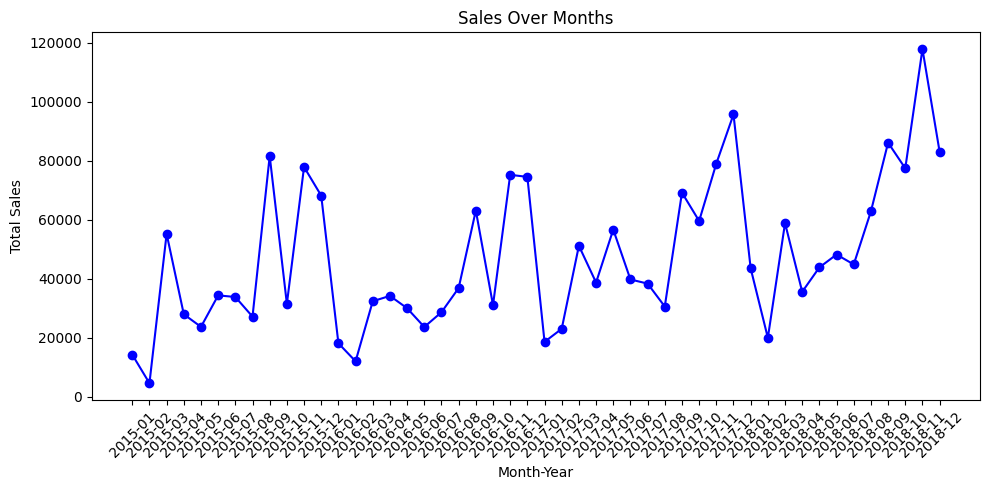

In [8]:
import matplotlib.pyplot as plt

monthly_sales = df.groupby('Month-Year')['Sales'].sum().reset_index()

plt.figure(figsize=(10, 5))
plt.plot(monthly_sales['Month-Year'], monthly_sales['Sales'], marker='o', color='blue')
plt.xticks(rotation=45)
plt.title('Sales Over Months')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()


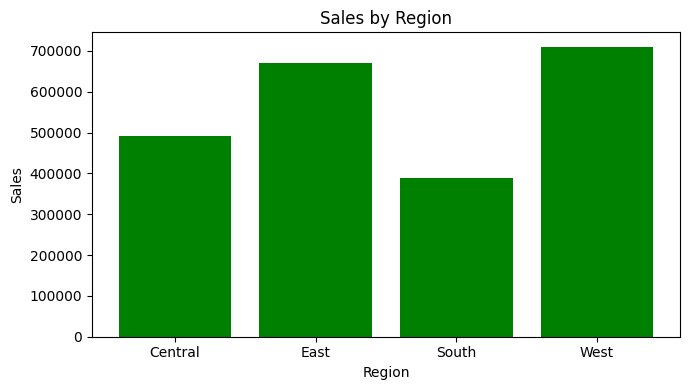

In [9]:
region_sales = df.groupby('Region')['Sales'].sum().reset_index()

plt.figure(figsize=(7, 4))
plt.bar(region_sales['Region'], region_sales['Sales'], color='green')
plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()


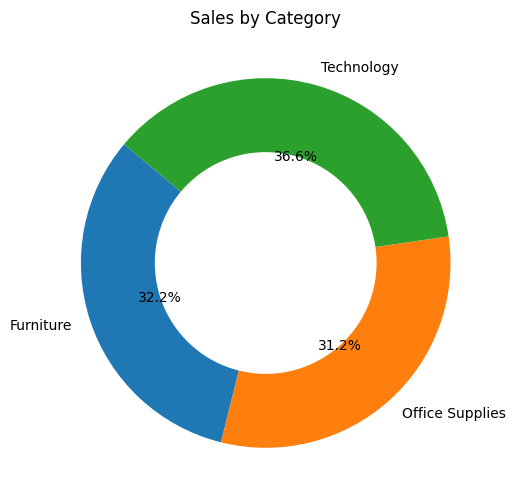

In [10]:
category_sales = df.groupby('Category')['Sales'].sum()

plt.figure(figsize=(6,6))
plt.pie(category_sales, labels=category_sales.index, autopct='%1.1f%%', startangle=140, wedgeprops={'width': 0.4})
plt.title('Sales by Category')
plt.show()


Insights:

1. Sales steadily increased from January to July 2023, peaking in June.
2. The West region had the highest total sales, followed by the East.
3. Technology category contributed the highest share to total sales.
4. The South region had the lowest overall sales during the year.
